# PGDDS - Statistics and EDA - Gross Domestic Product Assignment

**The overall goal of this project is to help the CMs focus on areas that will foster economic development for their respective states. Since the most common measure of economic development is the GDP, we need to analyse the GDP of the various states of India and suggest ways to improve it.**

## Part 1

1. *Analyse and compare the GDPs of various Indian states*
2. *Divide the states into four categories based on the GDP per capita, and for each of these four categories, analyse the sectors that contribute the most to the GDP (such as agriculture, real estate, manufacturing, etc.).*

In [2]:
#importing all required packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#Read Data 1a Data Set
df = pd.read_csv("input/data-1a/GDP_Data_1a.csv")


In [4]:
#Dropping Columns of Union Territories and West Bengal (as all records of West Bengal has no value)
#Here axis = 1 refers to column
altered_df = df.drop(['West Bengal1','Andaman & Nicobar Islands','Chandigarh','Delhi','Puducherry'],axis = 1)

In [5]:
#Filtering the data of GDSP, axis = 0 refers to rows of data
growth_ovr_rte = altered_df.drop(altered_df.index[:6],axis = 0)

In [6]:
avg_growth_ovr_rte = growth_ovr_rte.mean() #Average growth is computed to compare against states

In [7]:
#Removing All India GDP column as we are to plot for States of India
avg_growth_ovr_rte_state = avg_growth_ovr_rte.drop(['All_India GDP'])

#Assigning a seperate data frame for tracking insights at national level
growth_ovr_rte_India = growth_ovr_rte[['Duration','All_India GDP']]

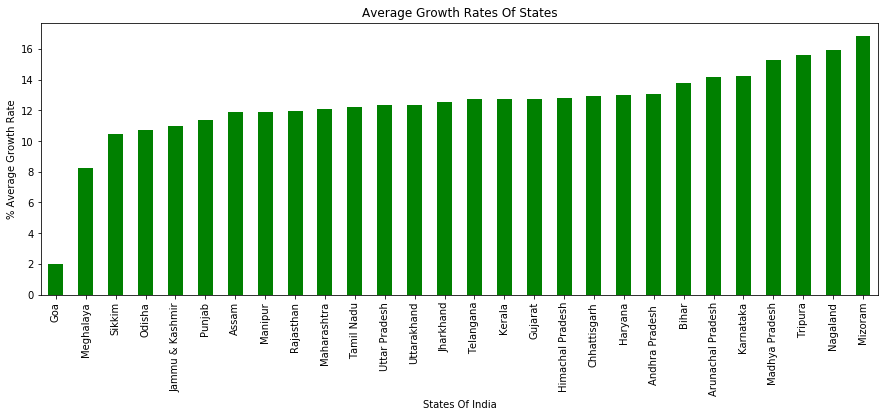

In [8]:
plt.figure(figsize=(15,5))

avg_growth_ovr_rte_state.sort_values().plot(kind = 'bar',color = 'Green')

plt.ylabel('% Average Growth Rate');plt.xlabel('States Of India')

plt.title('Average Growth Rates Of States')

plt.show()

***As seen in the above figure "Average Growth Rates Of States", we can compare the growth rate of states.***
1. *The growth rate of ```Goa``` is the slowest whereas Growth rate of ```Mizoram``` is of the highest*
2. *The first three fastest growing states are*
    1. Mizoram
    2. Nagaland
    3. Tripura
3. *The least three growing states are*
    1. Goa
    2. Meghalaya
    3. Sikkim

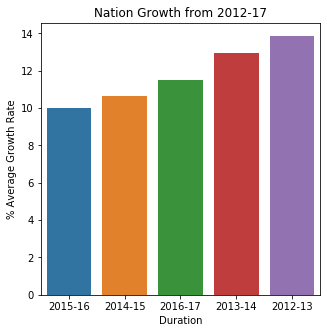

In [9]:
plt.figure(figsize=(5,5))
sns.barplot(x='Duration',y='All_India GDP',data = growth_ovr_rte_India.sort_values('All_India GDP'))
plt.title('Nation Growth from 2012-17')
plt.ylabel('% Average Growth Rate')
plt.show()

In [10]:
'The growth rate of Nation is ' +str(avg_growth_ovr_rte['All_India GDP'].round(2))+' and the growth rate of my home state Tamil Nadu is '+str(avg_growth_ovr_rte['Tamil Nadu'].round(2))

'The growth rate of Nation is 11.8 and the growth rate of my home state Tamil Nadu is 12.25'

In [11]:
'My home state Tamil Nadu grows at '+str((avg_growth_ovr_rte['Tamil Nadu']/avg_growth_ovr_rte['All_India GDP']).round(2))+' % to that of nation'

'My home state Tamil Nadu grows at 1.04 % to that of nation'

### Plot the total GDP of the states for the year 2015-16

 #### Steps Performed:

1. The *original data frame df is considered* as filtering the union territories is not expected for this part
2. iloc[:,2:-1] is used to *remove the first two columns* and consider the remaining columns
3. The result is *transposed* where in rows and columns are exchanged
4. The result is converted into a series by selecting the last column using: iloc[:,-1]
5. The output is then sorted in increasing order
6. Finally the null values are dropped using *dropna()*


In [12]:
total_gdp_state = df.loc[(df['Items  Description'] == "GSDP - CURRENT PRICES (` in Crore)")&(df.Duration == '2015-16')].iloc[:,2:-1].T.iloc[:,-1].sort_values().dropna()

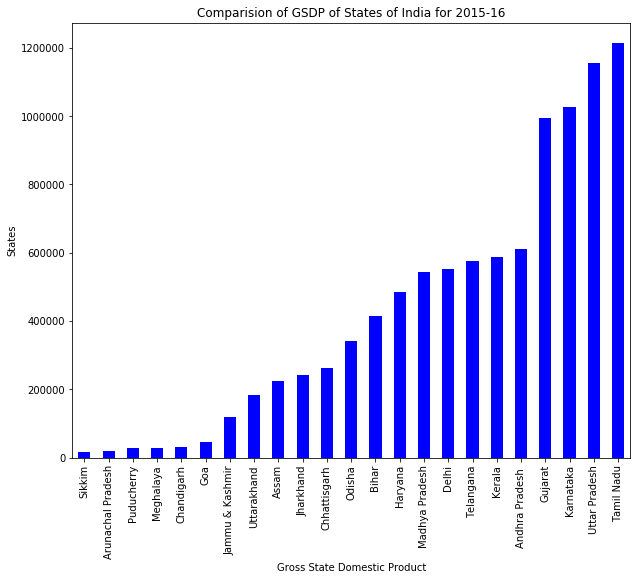

In [13]:
plt.figure(figsize = (10,8))
plt.xlabel('Gross State Domestic Product')
plt.ylabel('States')
plt.title('Comparision of GSDP of States of India for 2015-16')
total_gdp_state.plot(kind = 'bar', color = 'blue')
plt.show()

```Insights```
1. From the above image, we can conclude that ***Bar plot*** is best to compare data across states
2. The top 5 states based on total GSDP are
    1. Tamil Nadu
    2. Uttar Pradesh
    3. Karnataka
    4. Gujarat
    5. Andhra Pradesh
3. The bottom 5 states/UT based on total GSDP are
    1. Sikkim
    2. Arunachal Pradesh
    3. Puducherry
    4. Meghalaya
    5. Chandigarh



### Part 1B

*Plot the GDP per capita for all the states for the duration 2014-2015 exluding union territories.*

1. *The first step is to read the *NAD files and merge them into a single data frame, for this we will use glob  library package to read the paths of the files and read using pandas read_csv method*
2. *Then we need to consider only records for the duration 2014-2015*
3. *The files for union territories (Andaman, Chandigarh, Puducherry, Delhi) aren't considered/downloaded as per statement in Data Set page. Hence filtering them in data frame is not required*


In [14]:
from glob import glob

# read the *NAD files using glob operator

file_names = glob("input/data-1b/*NAD*.csv")


In [15]:
# Default Enoding UTF-8 gives (utf-8' codec can't decode some files)
#Hence using encoding ISO8859-1

#Retrieving only columns S.No, Item and 2014-15

## Creating a new derived metric called 'State' by taking the third index of filename after  splitting by hyphen
## Renaming the column 2014-15 to Amount
#Concatenating the contents to data frame df_state
df_state = pd.concat([pd.read_csv(f,encoding = "ISO-8859-1",usecols = ['S.No.','Item','2014-15']).assign(State= f.split('-')[2]).rename(columns = {'2014-15':'Amount'}) for f in file_names],sort=False)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26]),
 <a list of 27 Text xticklabel objects>)

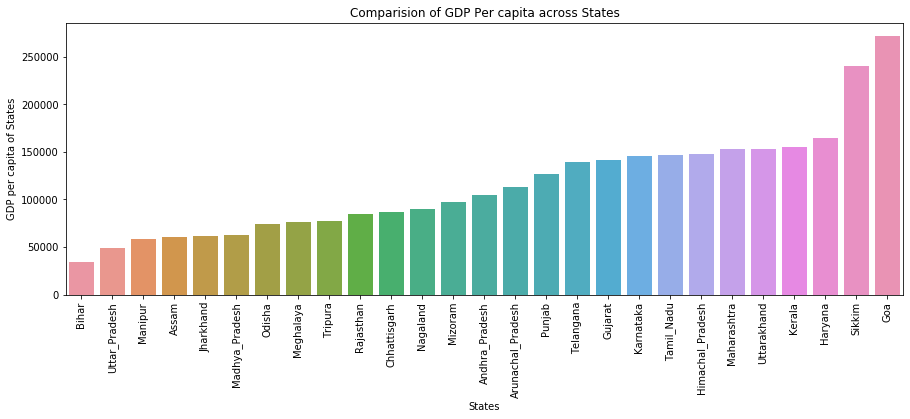

In [51]:
#Plotting a bar plot using State at X-Axis and Amount at Y-Axis and filtering for only Per Capita GSDP in ascending order
plt.figure(figsize = (15,5))

sns.barplot(x = 'State',y = 'Amount', data = df_state[df_state.Item == 'Per Capita GSDP (Rs.)'].sort_values('Amount'))
plt.xlabel('States')
plt.ylabel('GDP per capita of States')
plt.title('Comparision of GDP Per capita across States')
plt.xticks(rotation=90)

```Insights```

1. The top 5 states based on total Per capita GDP are
    1. Goa
    2. Sikkim
    3. Haryana
    4. Kerala
    5. Uttarkhand
3. The bottom 5 states based on total Per capita GDP are
    1. Bihar
    2. Uttar Pradesh
    3. Manipur
    4. Assam
    5. Jharkhand

In [17]:
#iat[0,2] is used to get the Cell value of GSDP and exlude remaining cell values of the data frame
'The ratio of the highest per capita GDP to the lowest per capita GDP is '+ str((df_state.loc[(df_state.Item == 'Per Capita GSDP (Rs.)')&(df_state.State == 'Goa')].iat[0,2])/(df_state.loc[(df_state.Item == 'Per Capita GSDP (Rs.)')&(df_state.State == 'Bihar')].iat[0,2]))

'The ratio of the highest per capita GDP to the lowest per capita GDP is 8.004741709371503'

#### Finding State-Wise Primary, Secondary, Tertiary and Gross State Domestic Product
1. Creating 4 data frames (one for total GSDP, one for total primary sector earnings, one for total secondary sector earnings and one for total tertiary sector earnings
2. Renaming the same column names for easy differentiation
3. Merging all the data frame into a single data frame using State as join clause and dropping the Item column

In [18]:
df_gsdp = df_state.loc[df_state.Item == 'Gross State Domestic Product']
df_primary_state = df_state.loc[df_state.Item == 'Primary'].rename(columns={'Amount':'Prim_Amount'})
df_secondary_state = df_state.loc[df_state.Item == 'Secondary'].rename(columns={'Amount':'Sec_Amount'})
df_tertiary_state = df_state.loc[df_state.Item == 'Tertiary'].rename(columns={'Amount':'Ter_Amount'})

In [19]:
df_merged_columns = df_gsdp.merge(df_primary_state,on='State').merge(df_secondary_state,on='State').merge(df_tertiary_state,on='State').drop(['Item_x','Item_y'],axis=1)

4. The percentage contribution of primary,secondary and tertiary is computed by dividing against total GSDP Amount
5. The combined contribution percentage of primary, secondary, tertiary is computed by adding individual percentages of primary,secondary and tertiary
6. Atlast, the data frame is sorted by combined contribution for viewing in ascending order

In [20]:
df_merged_columns['%contribution_of_primary'] = (df_merged_columns.Prim_Amount/df_merged_columns.Amount)*100
df_merged_columns['%contribution_of_secondary'] = (df_merged_columns.Sec_Amount/df_merged_columns.Amount)*100
df_merged_columns['%contribution_of_tertiary'] = (df_merged_columns.Ter_Amount/df_merged_columns.Amount)*100
df_merged_columns['%total_contribution'] = df_merged_columns['%contribution_of_primary'] + df_merged_columns['%contribution_of_secondary'] + df_merged_columns['%contribution_of_tertiary'] 
df_sorted = df_merged_columns.sort_values('%total_contribution',ascending=False)

7. ***Stacked Bar Chart*** is best to represent the subset of primary/secondary/tertiary to total contribution.
8. Reference used for plotting stacked bar chart : https://matplotlib.org/3.1.1/gallery/lines_bars_and_markers/bar_stacked.html?highlight=stacked%20bar%20plot

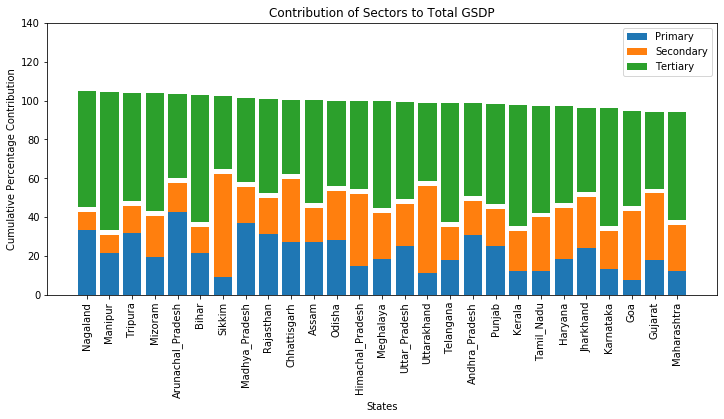

In [21]:
## p1 is the bar plot indicating only the primary contribution
## p2 is the bar plot indicating combination of primary and secondary contribution with primary contribution at bottom
## p3 is bar plot indicating combination of tertiary, primary and secondary contribution with primary and secondary contribution at bottom
## The range of yaxis is set using np.arange()
##Legends are set for pi, p2 and p3 as Primary,Secondary and Tertiary 

plt.figure(figsize=(12,5))

width = 0.8       # the width of the bars

p1 = plt.bar(df_sorted.State, df_sorted['%contribution_of_primary'], width)
p2 = plt.bar(df_sorted.State, df_sorted['%contribution_of_secondary'], width,
             bottom=df_sorted['%contribution_of_primary'])
p3 = plt.bar(df_sorted.State, df_sorted['%contribution_of_tertiary'], width,
             bottom=df_sorted['%contribution_of_primary']+df_sorted['%contribution_of_secondary'])


plt.ylabel('Cumulative Percentage Contribution')
plt.xlabel('States')
plt.title('Contribution of Sectors to Total GSDP')
plt.xticks(df_merged_columns.State, rotation = 90)
plt.yticks(np.arange(0, 160, 20))
plt.legend((p1[0], p2[0], p3[0]), ('Primary', 'Secondary','Tertiary'))

plt.show()


```Observations and Answers to Questions```

1. *The sum of primary , secondary and tertiary is not equal to total GDP because there are other factors like *            **Taxes on Products (Positive impact on GSDP)** *and* **Subsidies on products (negative impact on GSDP)**
2. Based on the above stacked bar plot, it is inferred that in all of the states except Arunachal Pradesh, Sikkim, Chhattisgarh, Uttarakhand  tertiary products contributes to the most of the growth 
4. Sikkim earns the highest revenue from Secondary sector whereas Nagaland earns the least
5. Arunachal Pradesh earns the highest revenue from Primary Sector whereas Goa earns the least
6. Manipur earns the highest from Tertiary Sector whereas Sikkim earns the least

```Categorization```

Categorise the states into four groups based on the GDP per capita (C1, C2, C3, C4, where C1 would have the highest per capita GDP and C4, the lowest). The quantile values are (0.20,0.5, 0.85, 1), i.e., the states lying between the 85th and the 100th percentile are in C1; those between the 50th and the 85th percentiles are in C2, and so on.

In [22]:
df_state_sorted = df_state[df_state.Item == 'Per Capita GSDP (Rs.)'].sort_values('Amount').drop('Item',axis=1)

In [23]:
##Number of states considered is 27
##Bucketing into 4 groups by creating a list 'buckets'
### Creating another list 'bucket_mod' by adding 0 and max(buckets)+1
### Using list comprehension and iloc splitting the data frame into multiple buckets

buckets = [round(0.2*27),round(0.5*27),round(0.85*27),27]
bucket_mod = [0] + buckets + [max(buckets)+1]

Segment = [df_state_sorted.iloc[bucket_mod[n]:bucket_mod[n+1]] for n in range(len(bucket_mod)-1)]

In [24]:
## C4 is the 0th to 20th percentile
## C3 is the 20th to 50th percentile
## C2 is the 50th to 85th percentile
## C1 is the 85th to 100th percentile

c4 = Segment[0]
c3 = Segment[1]
c2 = Segment[2]
c1 = Segment[3]

**Note :** 

**Examples for Sub-Sectors given in the Problem Description 2 is quite contradictory. For example, it indicates sub-sectors as ```agriculture, forestry and fishing, crops, manufacturing etc.``` On analysis of state wise data it is seen that, ```Crops``` is a sub-section under ```agriculture, forestry and fishing```. Having said that, the subsequent analysis considers all the sub-sectors (i.e , both parent sub-sector and it's child sub-sector)**

**Some Examples :**
1. ```Agriculture, forestry and fishing``` **and** ```crops``` 
2. ```Trade, repair, hotels and restaurants``` **and** ```Trade & repair services```
3. ```Transport, storage, communication & services related to broadcasting``` **and** ```Railways```

In [25]:
# Get all the fields that belong to the c1 states

C1_Sectors = df_state.loc[df_state.State.isin(c1.State)&(df_state['S.No.']!='Total')&
        (~df_state['Item'].isin(['TOTAL GSVA at basic prices','Taxes on Products','Subsidies on products',"Population ('00)",'Per Capita GSDP (Rs.)']))]

# Keeping only the necessary fields and grouping and sorting as required

C1_Sectors = C1_Sectors[['Item','Amount']].groupby(by='Item').sum().sort_values(by='Amount',ascending=False).reset_index()

# Creating a new column Percentage_of_GSDP for easy analysis and plotting later
C1_Sectors['%_of_GSDP'] = (C1_Sectors['Amount']/C1_Sectors['Amount'][0])*100

#Excluding the rows apart from first 5 , setting i =1 as zeroth row contains GSDP
i=1
j=4
while C1_Sectors.iloc[i:j,-1].sum() <= 79:
    j=j+1

top_sub_sectors_C1 = C1_Sectors[['Item','%_of_GSDP']].iloc[i:j].rename(columns={'Item':'Top Sub-Sector(s) of C1 Category'})

Text(0, 0.5, '% Share towards GSDP')

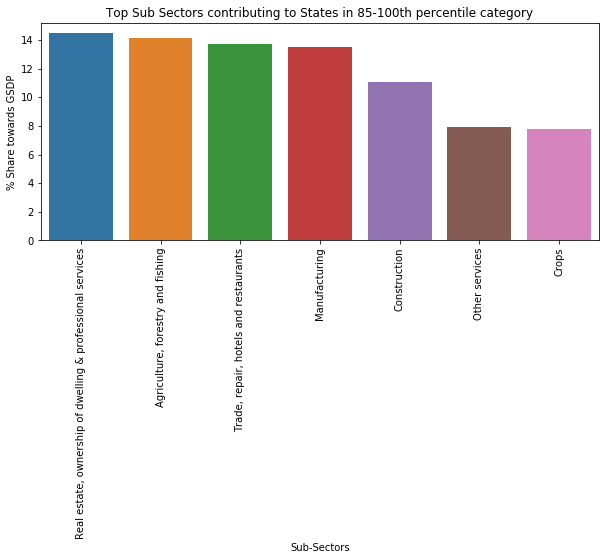

In [26]:
plt.figure(figsize=(10,4))
sns.barplot(x='Top Sub-Sector(s) of C1 Category',y='%_of_GSDP',data = top_sub_sectors_C1)
plt.xticks(rotation=90)
plt.title('Top Sub Sectors contributing to States in 85-100th percentile category')
plt.xlabel('Sub-Sectors')
plt.ylabel('% Share towards GSDP')

In [27]:
top_sub_sectors_C1 #Top sub-sectors of C1 catering to 80% GSDP

,Top Sub-Sector(s) of C1 Category,%_of_GSDP
1,"Real estate, ownership of dwelling & professio...",14.461049
2,"Agriculture, forestry and fishing",14.119213
3,"Trade, repair, hotels and restaurants",13.730076
4,Manufacturing,13.498187
5,Construction,11.051090
6,Other services,7.907258
7,Crops,7.811695


In [28]:
# Get all the fields that belong to the c2 states

C2_Sectors = df_state.loc[df_state.State.isin(c2.State)&(df_state['S.No.']!='Total')&
        (~df_state['Item'].isin(['TOTAL GSVA at basic prices','Taxes on Products','Subsidies on products',"Population ('00)",'Per Capita GSDP (Rs.)']))]

# Keeping only the necessary fields and grouping and sorting as required

C2_Sectors = C2_Sectors[['Item','Amount']].groupby(by='Item').sum().sort_values(by='Amount',ascending=False).reset_index()

# Creating a new column Percentage_of_GSDP for easy analysis and plotting later
C2_Sectors['%_of_GSDP'] = (C2_Sectors['Amount']/C2_Sectors['Amount'][0])*100

i=1
j=4
while C2_Sectors.iloc[i:j,-1].sum() <= 79:
    j=j+1

top_sub_sectors_C2 = C2_Sectors[['Item','%_of_GSDP']].iloc[i:j].rename(columns={'Item':'Top Sub-Sector(s) of C2 Category'})

Text(0, 0.5, '% Share towards GSDP')

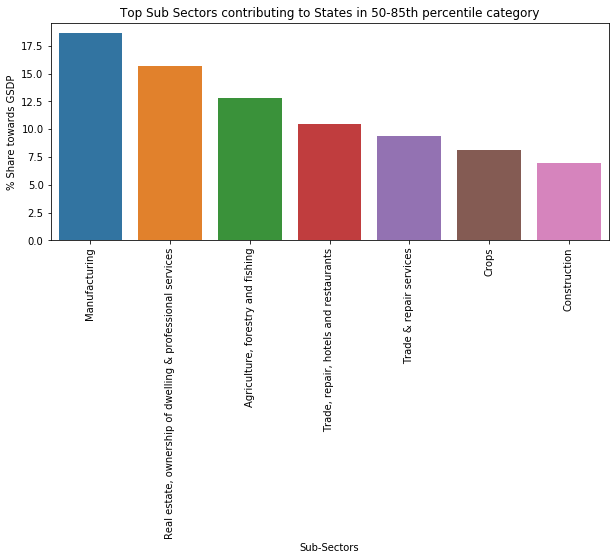

In [29]:
plt.figure(figsize=(10,4))
sns.barplot(x='Top Sub-Sector(s) of C2 Category',y='%_of_GSDP',data = top_sub_sectors_C2)
plt.xticks(rotation=90)
plt.title('Top Sub Sectors contributing to States in 50-85th percentile category')
plt.xlabel('Sub-Sectors')
plt.ylabel('% Share towards GSDP')

In [30]:
top_sub_sectors_C2 #Top sub-sectors of C2 cateing to 80% GSDP

,Top Sub-Sector(s) of C2 Category,%_of_GSDP
1,Manufacturing,18.622130
2,"Real estate, ownership of dwelling & professio...",15.710184
3,"Agriculture, forestry and fishing",12.825977
4,"Trade, repair, hotels and restaurants",10.443537
5,Trade & repair services,9.422608
6,Crops,8.109086
7,Construction,6.932967


In [31]:
# Get all the fields that belong to the c3 states

C3_Sectors = df_state.loc[df_state.State.isin(c3.State)&(df_state['S.No.']!='Total')&
        (~df_state['Item'].isin(['TOTAL GSVA at basic prices','Taxes on Products','Subsidies on products',"Population ('00)",'Per Capita GSDP (Rs.)']))]

# Keeping only the necessary fields and grouping and sorting as required

C3_Sectors = C3_Sectors[['Item','Amount']].groupby(by='Item').sum().sort_values(by='Amount',ascending=False).reset_index()

# Creating a new column Percentage_of_GSDP for easy analysis and plotting later
C3_Sectors['%_of_GSDP'] = (C3_Sectors['Amount']/C3_Sectors['Amount'][0])*100

i=1
j=4
while C3_Sectors.iloc[i:j,-1].sum() <= 79:
    j=j+1

top_sub_sectors_C3 = C3_Sectors[['Item','%_of_GSDP']].iloc[i:j].rename(columns={'Item':'Top Sub-Sector(s) of C3 Category'})

Text(0, 0.5, '% Share towards GSDP')

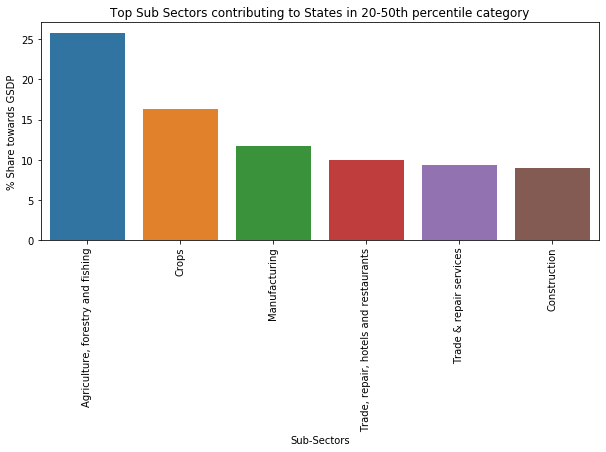

In [32]:
plt.figure(figsize=(10,4))
sns.barplot(x='Top Sub-Sector(s) of C3 Category',y='%_of_GSDP',data = top_sub_sectors_C3)
plt.xticks(rotation=90)
plt.title('Top Sub Sectors contributing to States in 20-50th percentile category')
plt.xlabel('Sub-Sectors')
plt.ylabel('% Share towards GSDP')

In [33]:
top_sub_sectors_C3 #Top sub-sectors of C3 catering to 80% GSDP

,Top Sub-Sector(s) of C3 Category,%_of_GSDP
1,"Agriculture, forestry and fishing",25.849557
2,Crops,16.312163
3,Manufacturing,11.676084
4,"Trade, repair, hotels and restaurants",9.993973
5,Trade & repair services,9.288358
6,Construction,8.892230


In [34]:
# Get all the fields that belong to the c4 states

C4_Sectors = df_state.loc[df_state.State.isin(c4.State)&(df_state['S.No.']!='Total')&
        (~df_state['Item'].isin(['TOTAL GSVA at basic prices','Taxes on Products','Subsidies on products',"Population ('00)",'Per Capita GSDP (Rs.)']))]

# Keeping only the necessary fields and grouping and sorting as required

C4_Sectors = C4_Sectors[['Item','Amount']].groupby(by='Item').sum().sort_values(by='Amount',ascending=False).reset_index()

# Creating a new column Percentage_of_GSDP for easy analysis and plotting later
C4_Sectors['%_of_GSDP'] = (C4_Sectors['Amount']/C4_Sectors['Amount'][0])*100

i=1
j=4
while C4_Sectors.iloc[i:j,-1].sum() <= 79:
    j=j+1

top_sub_sectors_C4 = C4_Sectors[['Item','%_of_GSDP']].iloc[i:j].rename(columns={'Item':'Top Sub-Sector(s) of C4 Category'})

Text(0, 0.5, '% Share towards GSDP')

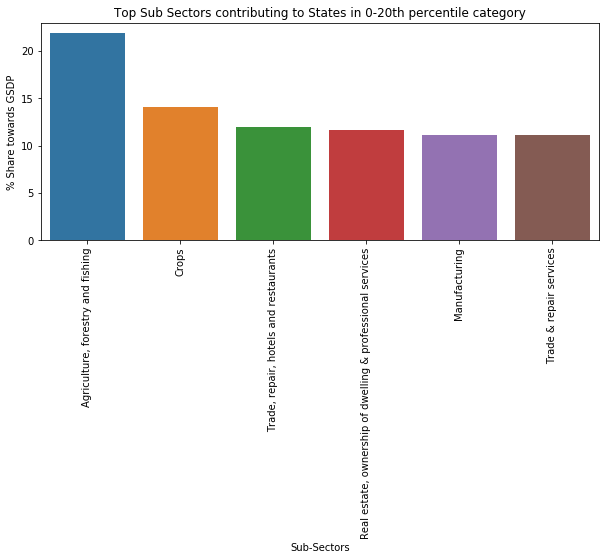

In [35]:
plt.figure(figsize=(10,4))
sns.barplot(x='Top Sub-Sector(s) of C4 Category',y='%_of_GSDP',data = top_sub_sectors_C4)
plt.xticks(rotation=90)
plt.title('Top Sub Sectors contributing to States in 0-20th percentile category')
plt.xlabel('Sub-Sectors')
plt.ylabel('% Share towards GSDP')

In [36]:
top_sub_sectors_C4 #Top sub-sectors of C4 cateing to 80% GSDP

,Top Sub-Sector(s) of C4 Category,%_of_GSDP
1,"Agriculture, forestry and fishing",21.885190
2,Crops,14.112128
3,"Trade, repair, hotels and restaurants",11.957100
4,"Real estate, ownership of dwelling & professio...",11.627645
5,Manufacturing,11.141726
6,Trade & repair services,11.092776


In [37]:

avg_gdp_c1 = round(C1_Sectors.iat[0,1]/c1.shape[0],2) #C1_Sectors.iat[0,1] gives the GSDP of C1 category and c1.shape[0] gives the total number of rows/states in C1 category
avg_gdp_c2 = round(C2_Sectors.iat[0,1]/c2.shape[0],2) #C2_Sectors.iat[0,1] gives the GSDP of C2 category and c2.shape[0] gives the total number of rows/states in C1 category
avg_gdp_c3 = round(C3_Sectors.iat[0,1]/c3.shape[0],2) #C3_Sectors.iat[0,1] gives the GSDP of C3 category and c3.shape[0] gives the total number of rows/states in C3 category
avg_gdp_c4 = round(C4_Sectors.iat[0,1]/c4.shape[0],2) #C4_Sectors.iat[0,1] gives the GSDP of C4 category and c4.shape[0] gives the total number of rows/states in C4 category

print('The Average GDP of C2 category is '+ str(round(avg_gdp_c2/avg_gdp_c1,2))+' times greater than C1')
print('The Average GDP of C4 category is '+ str(round(avg_gdp_c4/avg_gdp_c1,2))+' times greater than C1')
print('The Average GDP of C1 category almost matches with C3 category as : '+str(round(avg_gdp_c3/avg_gdp_c1,2)))
print('Category C2 contributes most to the Overall GDP : '+str(avg_gdp_c2))
print('Note : Average is taken to compare against states/categories as count is different for each category')

The Average GDP of C2 category is 2.56 times greater than C1
The Average GDP of C4 category is 1.45 times greater than C1
The Average GDP of C1 category almost matches with C3 category as : 0.99
Category C2 contributes most to the Overall GDP : 65153383.56
Note : Average is taken to compare against states/categories as count is different for each category


In [38]:
df_state.loc[(df_state['S.No.']!='Total')&
        (~df_state['Item'].isin(['TOTAL GSVA at basic prices','Taxes on Products','Subsidies on products',"Gross State Domestic Product"
                                 ,"Population .ipynb_checkpoints/'00)",'Per Capita GSDP (Rs.)']))].groupby(by='Item').sum().sort_values('Amount', ascending=False)


,Amount
Item,
"Agriculture, forestry and fishing",188562763.0
Manufacturing,169980686.0
"Real estate, ownership of dwelling & professional services",147263343.0
"Trade, repair, hotels and restaurants",119963925.0
Crops,118519981.0
Trade & repair services,102012822.0
Construction,90401882.0
Other services,72988011.0
"Transport, storage, communication & services related to broadcasting",68991652.0


From the above table, we can conclude that following sub-sectors are correlated to high GDP across categories

1. ```Agriculture, forestry and fishing```
2. ```Manufacturing```
3. ```Real estate, ownership of dwelling & professional services```
4. ```Trade, repair, hotels and restaurants```

We have already seen  the sub-sectors which contribute the most by each category

**Some Interesting Observations**

1. *The states which are in C1 category are Kerala, Haryana, Sikkim and Goa. One common thing amongst them is they are relatively smaller in size when compared to other states of India. This could influence it's rate of GDP. There are certain outliers like Manipur which is opposite to this hypothesis*
2. *The people/state governments in C1 category earns more than other category people for the same man hours spent. This is assumed on the basis on per capita GDP of C1 category is of the highest*

In [39]:
C1_Sectors[C1_Sectors.index >= 21] #The sectors which category C1 needs to focus on is shown below

,Item,Amount,%_of_GSDP
21,Mining and quarrying,588961.0,0.577805
22,Railways,587419.0,0.576293
23,Services incidental to transport,281108.0,0.275784
24,Air transport,171388.0,0.168142
25,Water transport,44776.0,0.043928
26,Storage,18106.0,0.017763


In [40]:
C2_Sectors[C2_Sectors.index >= 21] #The sectors which category C2 needs to focus on is shown below

,Item,Amount,%_of_GSDP
21,Railways,2494518.0,0.425409
22,Services incidental to transport,1735162.0,0.295911
23,Air transport,659841.0,0.112528
24,Storage,368515.0,0.062846
25,Water transport,318192.0,0.054264
26,Road transport*,307147.0,0.052380


In [41]:
C3_Sectors[C3_Sectors.index >= 21] #The sectors which category C3 needs to focus on is shown below

,Item,Amount,%_of_GSDP
21,Services incidental to transport,987204.0,0.436498
22,Water transport,145480.0,0.064325
23,Storage,104405.0,0.046163
24,Services incidental to transport*,88721.0,0.039229
25,Air transport,85716.0,0.037900


In [42]:
C4_Sectors[C4_Sectors.index >= 20] #The sectors which category C4 needs to focus on is shown below

,Item,Amount,%_of_GSDP
20,Hotels & restaurants,1599466.0,0.864324
21,Services incidental to transport,238539.0,0.128902
22,Storage,192928.0,0.104255
23,Air transport,89408.0,0.048315
24,Water transport,7411.0,0.004005


1. Across categories, potential of  **Air Transport/Water Transport** needs to be enhanced by creating/improving infrastructures for these. 
2. **Storage** is another un-tapped potential revenue which needs to be focussed
3. Tertiary Sector is contributing high towards GSDP. Hence we need to maintain the same momemtum on sub-sectors of tertiary sector to sustain the contribution of it towards GSDP and possibly improving it further

**Recommendation:**

1. For each category, concentrate more on the sub-sectors which are having very high potential (example TRANSPORT ) and are contributing very less to GSDP. The government needs to reduce the losses occuring in these sub-sectors. 
2. Focus intact and maintain the same momemtum on sub-sectors of tertiary sector to sustain the contribution of it towards GSDP and possibly improving it further
3. As seen above, Average GSDP of C4 category is 1.45 times greater than C1 and the average GSDP of C1 category almost matches with C3 category as : 0.99. This is in sharp contranst to  the per capita income of C4 and C3 category , as it is way less when compared to that of C1.  Government needs to focus on restricting the population levels in C3 and C4 category to have a positive impact on GSDP for these categories
4. One way to increase per capita GDP is by shifting the distribution of GDP towards the secondary and tertiary sectors, i.e., the manufacturing and services industries.

# Part 2 GDP and Education Dropout Rates

In [43]:
#Read Data 2 Data Set
df_edu = pd.read_csv("input/data-2/Data-2_DropOutRate.csv")

In [44]:
df_edu = df_edu[['Level of Education - State','Primary - 2014-2015.1','Upper Primary - 2014-2015','Secondary - 2014-2015']].rename(columns={'Level of Education - State' : 'State','Primary - 2014-2015.1':'Primary','Upper Primary - 2014-2015':'Upper Primary','Secondary - 2014-2015':'Secondary'})

In [45]:
# Replacing _ with space so that merge of two csv files by using State works fine
#Also correcting the spellings of Chhatisgarh AND Uttrakhand in line with drop out file

df_states = df_state.replace({'State': '_','State': 'Chhattisgarh','State': 'Uttarakhand'}, {'State': ' ','State': 'Chhatisgarh','State': 'Uttrakhand'}, regex=True)

In [46]:
#Dropping Nan using dropna. Computing mean, median is not right thing here
df_edu_states = pd.merge(df_states[df_states.Item=='Per Capita GSDP (Rs.)'], df_edu, on = 'State').dropna()

In [47]:
df_edu_states['Total Drop Out'] = df_edu_states['Primary']+df_edu_states['Upper Primary']+df_edu_states['Secondary']

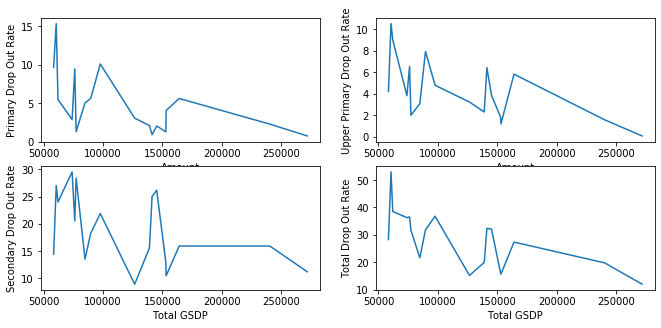

In [52]:
plt.figure(figsize=(11,5))
plt.subplot(221)
sns.lineplot(x='Amount',y='Primary',data = df_edu_states)
plt.ylabel('Primary Drop Out Rate')
plt.subplot(222)
sns.lineplot(x='Amount',y='Upper Primary',data = df_edu_states)
plt.ylabel('Upper Primary Drop Out Rate')
plt.subplot(223)
sns.lineplot(x='Amount',y='Secondary',data = df_edu_states)
plt.xlabel('Total GSDP')
plt.ylabel('Secondary Drop Out Rate')
plt.subplot(224)
sns.lineplot(x='Amount',y='Total Drop Out',data = df_edu_states)
plt.xlabel('Total GSDP')
plt.ylabel('Total Drop Out Rate')

plt.show()

```Insights```

1. Based on above sub-plots we can confirm that the ***GSDP increases with decrease in drop out rate*** across Primary, Upper Primary and Secondary and Total of these for the year 2014-2015

In [49]:
df_state_population = df_states.loc[df_states.Item == "Population ('00)"]
df_population_dropout = pd.merge(df_state_population, df_edu_states, on = 'State')

In [50]:
df_population_dropout.rename(columns={'Amount_x': 'Population','Amount_y':'Per capita GSDP'}).drop(['Item_x','S.No._x','S.No._y','Item_y'],axis =1).sort_values('Total Drop Out',ascending=False)

,Population,State,Per capita GSDP,Primary,Upper Primary,Secondary,Total Drop Out
0,326780.0,Assam,60621.0,15.36,10.51,27.06,52.93
4,349660.0,Jharkhand,62091.0,5.48,8.99,24.00,38.47
9,11833.0,Mizoram,97687.0,10.10,4.78,21.88,36.76
8,32020.0,Meghalaya,76228.0,9.46,6.52,20.52,36.50
11,435220.0,Odisha,73979.0,2.86,3.81,29.56,36.23
2,633590.0,Gujarat,141263.0,0.89,6.41,25.04,32.34
5,635100.0,Karnataka,145141.0,2.02,3.85,26.18,32.05
10,20550.0,Nagaland,89607.0,5.61,7.92,18.23,31.76
16,38350.0,Tripura,77358.0,1.28,1.99,28.42,31.69
7,30873.0,Manipur,58442.0,9.66,4.20,14.38,28.24


```Observations on Correlation between Population and Drop Out Rate```

1. Based on the above table, we can conclude that there is no direct relationship between Population and Total Drop Out Rate (Cumulative value of Primary, Upper Primary and Secondary). 
2. Highest population is at Uttar Pradesh whose drop out is 21.50% whereas the highest total drop out rate (52.93%) is at Assam whose population is relatively in mid-range